<a href="https://colab.research.google.com/github/jiwan-gharti-savi/pytorch/blob/main/Basic_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
import numpy as np

In [ ]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X[0]

array([0.75424625, 0.23148074])

In [ ]:
X[:, 0][:5]

array([ 0.75424625, -0.75615888, -0.81539193, -0.39373073,  0.44220765])

In [ ]:
y[0]

1

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})

In [ ]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


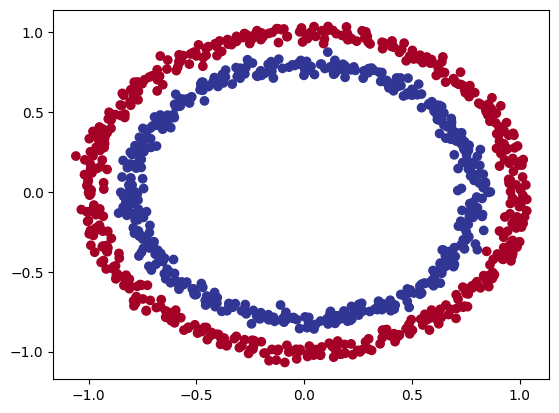

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0], y = X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
type(X)

numpy.ndarray

In [ ]:
import torch
import torch.nn as nn

In [ ]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
type(X), len(X), len(y)

(torch.Tensor, 1000, 1000)

In [ ]:
X.type, X.dtype

(<function Tensor.type>, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# make a device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [ ]:
model_0 = CircleModelV0().to(device)

In [ ]:
model_0.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[-0.1498, -0.3414],
                      [-0.1873, -0.4791],
                      [ 0.6876, -0.5163],
                      [-0.4227,  0.3733],
                      [-0.3985, -0.1386]])),
             ('layer_1.bias',
              tensor([-0.2479, -0.1322, -0.1033, -0.5257,  0.0253])),
             ('layer_2.weight',
              tensor([[-0.2050,  0.0743,  0.0537, -0.0280, -0.2188]])),
             ('layer_2.bias', tensor([-0.1872]))])

In [ ]:
# untrained prediction

model_0.eval()
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

untrained_preds

tensor([[-1.8178e-01],
        [-1.1475e-01],
        [-2.5830e-01],
        [-1.6051e-01],
        [-1.0087e-01],
        [-6.1178e-02],
        [ 2.7745e-03],
        [ 1.5723e-02],
        [-2.6483e-01],
        [-1.0852e-01],
        [-1.9351e-01],
        [-1.5649e-01],
        [ 1.5357e-02],
        [-2.4712e-01],
        [-2.8836e-01],
        [-2.7086e-02],
        [-6.5790e-02],
        [-2.2806e-01],
        [-2.1660e-01],
        [-2.5742e-01],
        [-1.1448e-01],
        [ 5.7131e-03],
        [-2.3324e-01],
        [-2.5514e-01],
        [-2.5515e-02],
        [ 3.6485e-03],
        [-2.0403e-01],
        [-2.5143e-02],
        [-3.0055e-01],
        [-2.2278e-01],
        [-3.5499e-02],
        [-3.1699e-02],
        [-1.8172e-01],
        [-1.5238e-01],
        [-1.9636e-01],
        [-1.0308e-01],
        [-1.6078e-01],
        [-2.5279e-01],
        [-1.7854e-01],
        [-2.3726e-01],
        [-2.4108e-01],
        [-2.6806e-01],
        [-6.5113e-02],
        [-1

In [ ]:
y_test[:10], untrained_preds[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.1818],
         [-0.1148],
         [-0.2583],
         [-0.1605],
         [-0.1009],
         [-0.0612],
         [ 0.0028],
         [ 0.0157],
         [-0.2648],
         [-0.1085]]))

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
correct = torch.eq(torch.tensor([1,1,1]), torch.tensor([1,0,1])).sum().item()

correct

2

In [ ]:
# logits

with torch.inference_mode():
  logits = model_0(X_test.to(device))[:5]

logits

tensor([[-0.1818],
        [-0.1148],
        [-0.2583],
        [-0.1605],
        [-0.1009]])

In [ ]:
# logits should be passed to sigmoid activation function to make probabilities in binary classification

y_pred_prob = torch.sigmoid(logits)
y_pred_prob

tensor([[0.4547],
        [0.4713],
        [0.4358],
        [0.4600],
        [0.4748]])

In [ ]:
# labels
y_pred = torch.round(y_pred_prob)
y_pred

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
y_pred.squeeze()

tensor([0., 0., 0., 0., 0.])

In [ ]:
torch.eq(y_test.squeeze()[:5], y_pred.squeeze())

tensor([False,  True, False,  True, False])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
epochs = 100

for epoch in range(epochs):

  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.sigmoid(y_logits)
  labels = torch.round(y_pred)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_function(labels, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.sigmoid(test_logits)
    test_labels = torch.round(test_pred)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_function(test_labels, y_test)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Accuracy: {acc:.2f} | Test Loss {test_loss} | Test Accuracy {test_acc}%")

Epoch: 0 | Train Loss: 0.69592 | Train Accuracy: 41.50 | Test Loss 0.6983534097671509 | Test Accuracy 41.0%
Epoch: 10 | Train Loss: 0.69478 | Train Accuracy: 47.50 | Test Loss 0.6973708868026733 | Test Accuracy 43.5%
Epoch: 20 | Train Loss: 0.69416 | Train Accuracy: 47.38 | Test Loss 0.6968520879745483 | Test Accuracy 49.5%
Epoch: 30 | Train Loss: 0.69381 | Train Accuracy: 48.62 | Test Loss 0.6965569853782654 | Test Accuracy 49.0%
Epoch: 40 | Train Loss: 0.69360 | Train Accuracy: 49.00 | Test Loss 0.6963715553283691 | Test Accuracy 50.0%
Epoch: 50 | Train Loss: 0.69346 | Train Accuracy: 49.00 | Test Loss 0.6962413787841797 | Test Accuracy 50.0%
Epoch: 60 | Train Loss: 0.69336 | Train Accuracy: 49.75 | Test Loss 0.6961403489112854 | Test Accuracy 49.5%
Epoch: 70 | Train Loss: 0.69329 | Train Accuracy: 50.00 | Test Loss 0.6960558295249939 | Test Accuracy 49.0%
Epoch: 80 | Train Loss: 0.69324 | Train Accuracy: 50.12 | Test Loss 0.6959814429283142 | Test Accuracy 48.0%
Epoch: 90 | Train Lo

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

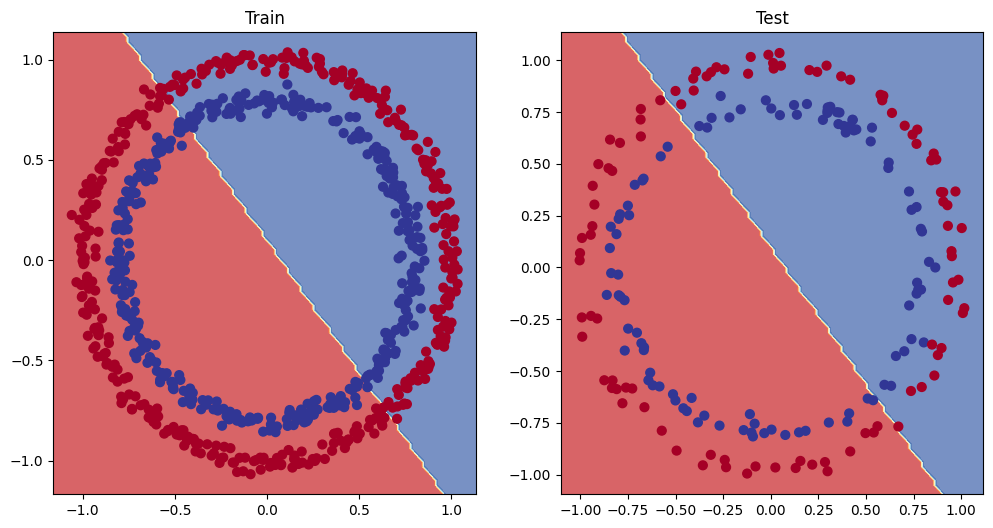

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:


### Model 1

# increases hidden layers

In [ ]:
class CirclesModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
model_1 = CirclesModelV1()

In [ ]:
epochs = 100

for epoch in range(epochs):


  model_1.train()

  logits = model_1(X_train).squeeze()
  y_pred = torch.sigmoid(logits)
  labels = torch.round(y_pred)

  loss = loss_fn(logits, y_train)
  acc = accuracy_function(labels, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.sigmoid(test_logits)
    test_labels = torch.round(test_pred)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_function(test_labels, y_test)


  if epoch % 10 == 0:
    print("Epoch: ", epoch, " | Train Loss: ", loss, " | Train Accuracy: ", acc, " | Test Loss: ", test_loss, " | Test Accuracy: ", test_acc)

Epoch:  0  | Train Loss:  tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.875  | Test Loss:  tensor(0.6926)  | Test Accuracy:  51.0
Epoch:  10  | Train Loss:  tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.875  | Test Loss:  tensor(0.6926)  | Test Accuracy:  51.0
Epoch:  20  | Train Loss:  tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.875  | Test Loss:  tensor(0.6926)  | Test Accuracy:  51.0
Epoch:  30  | Train Loss:  tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.875  | Test Loss:  tensor(0.6926)  | Test Accuracy:  51.0
Epoch:  40  | Train Loss:  tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.875  | Test Loss:  tensor(0.6926)  | Test Accuracy:  51.0
Epoch:  50  | Train Loss:  tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.875  | Test Loss:  tensor(0

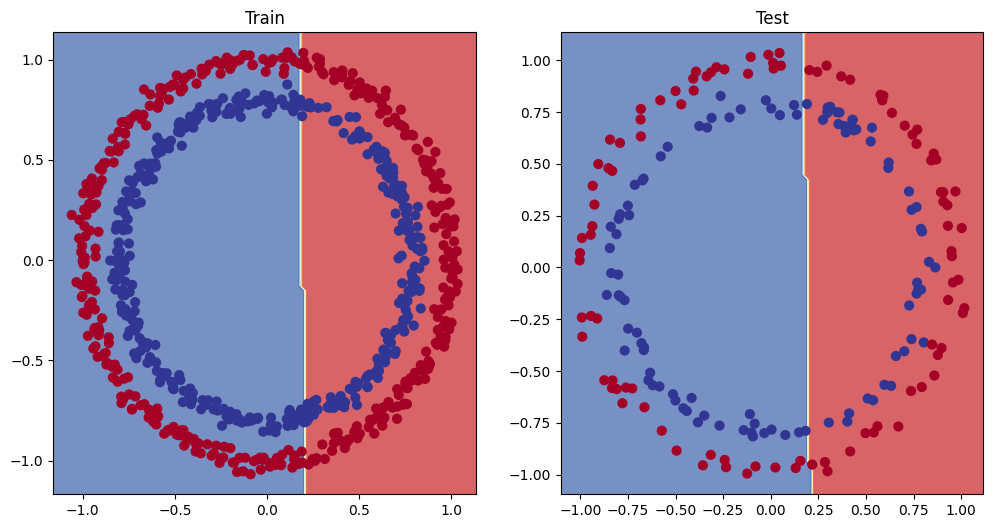

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
# model 3: using non-linear activation funciton


In [ ]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 =   nn.Linear(in_features=10, out_features=5)
    self.layer_3 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
model_3 = CircleModelV3()

In [ ]:

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  logits = model_3(X_train).squeeze()
  y_pred = torch.sigmoid(logits)
  labels = torch.round(y_pred)

  loss = loss_fn(logits, y_train)

  acc = accuracy_function(labels, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.sigmoid(test_logits)
    test_labels = torch.round(test_pred)

    test_acc = accuracy_function(test_labels, y_test)
    test_loss = loss_fn(test_logits, y_test)

  if epoch % 100 == 0:
    print("Epoch: ", epoch, " | Train Loss: ", loss, " | Train Accuracy: ", acc, " | Test Loss: ", test_loss, " | Test Accuracy: ", test_acc)

Epoch:  0  | Train Loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.0  | Test Loss:  tensor(0.7150)  | Test Accuracy:  50.0
Epoch:  100  | Train Loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.0  | Test Loss:  tensor(0.7150)  | Test Accuracy:  50.0
Epoch:  200  | Train Loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.0  | Test Loss:  tensor(0.7150)  | Test Accuracy:  50.0
Epoch:  300  | Train Loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.0  | Test Loss:  tensor(0.7150)  | Test Accuracy:  50.0
Epoch:  400  | Train Loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.0  | Test Loss:  tensor(0.7150)  | Test Accuracy:  50.0
Epoch:  500  | Train Loss:  tensor(0.7173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)  | Train Accuracy:  50.0  | Test Loss:  tensor(0.7150) 

In [ ]:
for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_function(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_function(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 200 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 300 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 400 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 500 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 600 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 700 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 800 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%
Epoch: 900 | Loss: 0.71735, Accuracy: 50.00% | Test Loss: 0.71499, Test Accuracy: 50.00%


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_pred = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred)


y_pred

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)